# Homework 10: Linear Regression


**Reading**: 
* [Prediction](https://www.inferentialthinking.com/chapters/15/prediction.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

Homework 10 is due **Thursday, 11/8 at 11:59pm**. You will receive an early submission bonus point if you turn in your final submission by Wednesday, 11/7 at 11:59pm. Start early so that you can come to office hours if you're stuck. Check the website for the office hours schedule. Late work will not be accepted as per the [policies](http://data8.org/fa18/policies.html) of this course. 

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [9]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from client.api.notebook import Notebook
ok = Notebook('hw10.ok')
_ = ok.auth(inline=True)

Assignment: Homework 10: Linear Regression
OK, version v1.12.5

Successfully logged in as emilyxu@berkeley.edu


## 1. Triple Jump Distances vs. Vertical Jump Heights


Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data.

In [10]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


#### Question 1
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows the regression line**. 

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

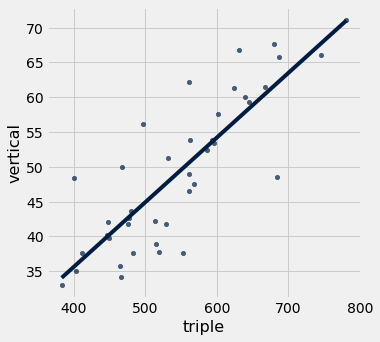

In [11]:
jumps.scatter('triple', 'vertical', fit_line=True)

#### Question 2
Does the correlation coefficient `r` look closest to 0, .5, or -.5? Explain. 

The correlation coefficient r looks closest to 0.5 because there is a positive association between the values given.

In [12]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

In [13]:
def regression_parameters(t):
    r = np.average(standard_units(t.column(0))*standard_units(t.column(1)))                         
    slope = r*np.std(t.column(1))/np.std(t.column(0))
    intercept = np.mean(t.column(1)) - slope*np.mean(t.column(0))
    return make_array(r, slope, intercept)

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(jumps)
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [8]:
_ = ok.grade('q1_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/OyBOMB
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

**Hint:** Make sure to convert from meters to centimeters!

In [14]:
parameters

triple_record_vert_est = parameters.item(1)*1829+parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [10]:
_ = ok.grade('q1_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/VPMYAB
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



In [11]:
# This code below is just to help me draw some conclusions about the data for question 5.

In [12]:
jumps.where('triple', are.above(700))

triple,vertical
781,71.1
745.95,66.14


In [13]:
parameters.item(1)*781+parameters.item(2)

71.03311596063669

In [14]:
parameters.item(1)*745.95+parameters.item(2)

67.77496324037718

#### Question 5
Do you expect this estimate to be accurate within a few centimeters? Why or why not?

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

I don't really expect this estimate to be estimate because Edwards' triple jump distance is far larger than any other jump on the table.

However we should consider whether or not it's humanely possible to actually have a certical jump of 168 centimeters. The current world record (unofficially) is 165 centimeters, so I'd say it's possible! But is the estimate accurate? Probably not.

## 2. Cryptocurrencies


Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we [load](https://www.kaggle.com/jessevent/all-crypto-currencies/data) two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [3]:
btc = Table.read_table('btc.csv')
btc

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5
2015-10-04,238.53,238.26,3502460000,6
2015-10-05,238.15,240.38,3497740000,7
2015-10-06,240.36,246.06,3531230000,8
2015-10-07,246.17,242.97,3617400000,9
2015-10-08,243.07,242.3,3572730000,10


In [4]:
eth = Table.read_table('eth.csv')
eth

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5
2015-10-04,0.686343,0.668379,50556000,6
2015-10-05,0.666784,0.628643,49131600,7
2015-10-06,0.622218,0.650645,45863300,8
2015-10-07,0.650515,0.609388,47964700,9
2015-10-08,0.609501,0.621716,44955900,10


#### Question 1

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values roughly move together.

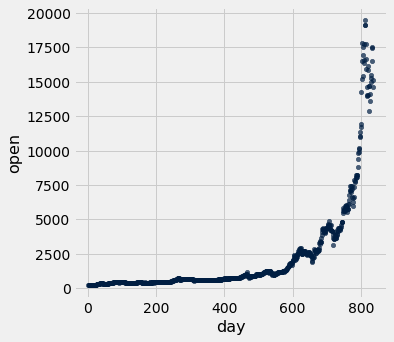

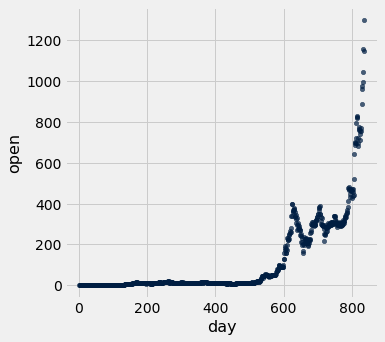

In [5]:
btc.scatter('day', 'open')
eth.scatter('day', 'open')

It looks like both btc ad eth have a roughly exponential shape. It looks like eth has had a little more ups and downs that btc, but for the most part, both btc and eth have gone up in value in an astonishing rate.

#### Question 2

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

*Hint:* It may be helpful to define and use the function `std_units`.

In [15]:
def std_units(any_numbers): 
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 

standard_btc = std_units(btc.column(1))
standard_eth = std_units(eth.column(1))

r = np.average(standard_btc*standard_eth)
r

0.9250325764148278

In [19]:
_ = ok.grade('q2_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/mQ4AqE
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

**Note:** Make sure that your `eth_predictor` is using linear regression.

In [17]:
# This function predicts eth price from the btc price.
# Column 1 refers to the opening price.

open_prices = Table().with_columns(
    "btc", btc.column(1),
    "eth", eth.column(1)
)

def eth_predictor(btc_price):
    parameters = regression_parameters(open_prices)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    return (slope*btc_price) + intercept

eth_predictor(10)

2.6421542032063714

In [18]:
_ = ok.grade('q2_3')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/XoJxlm
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://www.inferentialthinking.com/chapters/15/2/regression-line.html
"> here. </a>
* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

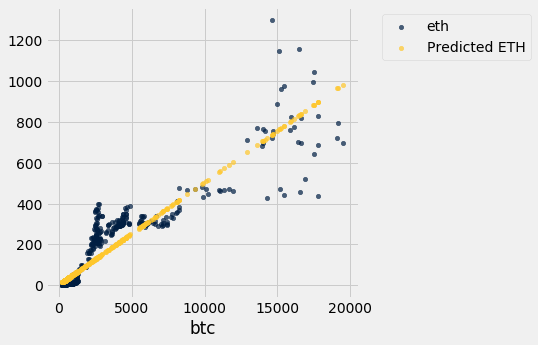

In [21]:
# Predict the ETH opening price given BTC opening prices.

all_prices = open_prices.with_column("Predicted ETH", eth_predictor(btc.column(1)))
all_prices.scatter(0)

#### Question 5
Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable?

If you look towards the left at lower values of BTC, my model looks correct. However when the values are higher (more to the right) the predictor doesn't do that great of a job predicting the true ETH value. That being said the true ETH follows a sort of curve instead of a straight line, so I'd say this model isn't the most accurate.

#### Question 6

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting ETH price given a BTC price? Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `regression_parameters` changes when switching BTC and ETH as $x$ and $y$. For example, if r changes, the slope changes, but the intercept wouldn't change, the array would be `[True, True, False]`

In [22]:
regression_changes = make_array('False', 'True', 'True')
regression_changes

array(['False', 'True', 'True'], dtype='<U5')

In [23]:
_ = ok.grade('q2_6')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/6REoJQ
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 3. Evaluating NBA Game Predictions


#### A brief introduction to sports betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner is the team with more points.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**


In [24]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

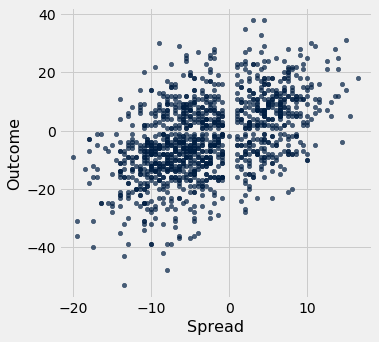

In [25]:
spreads.scatter("Spread", "Outcome")

#### Question 1
Why do you think that the spread and outcome are never 0, aside from 1 case of the spread being 0? 

**Hint:** Read the first paragraph of the Wikipedia article on basketball [here](https://en.wikipedia.org/wiki/Basketball) if you're confused!

The spread and outcome are never 0 because that would mean both teams tied. This is never the case because there is always overtime.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? 

*Hint:* Read the documentation for the predicate `are.between_or_equal_to` [here](http://data8.org/datascience/predicates.html#datascience.predicates.are.between_or_equal_to).

In [26]:
spreads_around_5 = spreads.where('Spread', are.between_or_equal_to(3.5, 6.5)).column('Spread')
spread_5_outcome_average = np.average(spreads_around_5)
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.955882352941177


In [27]:
_ = ok.grade('q3_2')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/Q0yJzM
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 3
If the average outcome for games with any given spread turned out to be **exactly** equal to that spread, what would the slope and intercept of the linear regression line be, in original units? Hint: If you're stuck, try drawing a picture!

In [28]:
expected_slope_for_equal_spread = 1
expected_intercept_for_equal_spread = 0

In [29]:
_ = ok.grade('q3_3')

_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/RozYNz
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 4
Fix the `standard_units` function below.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [30]:
def standard_units(nums):
    """Return an array where every value in nums is converted to standard units."""
    return (nums - np.mean(nums))/np.std(nums) 

In [31]:
_ = ok.grade('q3_4')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/59DnPq
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 5
Compute the correlation coefficient between outcomes and spreads. 

**Note:** It might be helpful to use the `standard_units` function.

In [35]:
spread_column = standard_units(spreads.column('Spread'))
outcome_column = standard_units(spreads.column('Outcome'))

spread_r = np.average(spread_column*outcome_column)
spread_r

0.49181413688314235

In [36]:
_ = ok.grade('q3_5')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/E9jOnl
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6
Compute the slope of the least-squares linear regression line that predicts outcomes from spreads, in original units.

In [39]:
def errors(tbl, slope, intercept):
    actual = tbl.column(1)
    predicted = tbl.column(0)*slope + intercept
    return actual - predicted

def regr_line(tbl):
    def mrse(a,b):
        return np.sqrt(np.mean((errors(tbl, a, b))**2))
    return minimize(mrse)

spread_and_outcome = spreads.select(6,5)
spread_slope = regr_line(spread_and_outcome).item(0)
spread_slope


0.9538157847834711

In [40]:
_ = ok.grade('q3_6')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/D9gNX6
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 7
For the "best fit" line that estimates the average outcome from the spread, the slope is less than 1. Does knowing the slope alone tell you whether the average spread was higher than the average outcome? If so, set the variable name below to `True`. If you think you need more information than just the slope of the regression line to answer that question, then respond `False`. Briefly justify your answer below. (HINT: Does the intercept matter?)

In [41]:
slope_implies_average_spread_above_average_outcome = False

When the slope is less than 1, that means that for 1 increase in spread, the outcome values decrease slightly less. If the intercept is greater than the difference, the average outcome is higher than the average spread.

In [42]:
_ = ok.grade('q3_7')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw10.ipynb'.
Backup... 100% complete
Backup successful for user: emilyxu@berkeley.edu
URL: https://okpy.org/cal/data8/fa18/hw10/backups/qY3RJ0
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## 4. Submission


Once you're finished, select "Save and Checkpoint" in the File menu and then execute the `submit` cell below. The result will contain a link that you can use to check that your assignment has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

In [ ]:
_ = ok.submit()

<IPython.core.display.Javascript object>

In [43]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q') and len(q) <= 10]
print("Finished running all tests.")

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running t